In [252]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.3f' % x)
from scipy.stats import skew

In [136]:
# load data
train = pd.read_csv('/Users/pliu/Downloads/all/train.csv')
test = pd.read_csv('/Users/pliu/Downloads/all/test.csv')
train.shape # (1460, 81)
test.shape # (1459, 80)

(1459, 80)

In [137]:
# check if duplication in identifer exists
print(train.shape[0] - len(set(train.Id)))
print(test.shape[0] - len(set(test.Id)))
# no duplicate in identifer

0
0


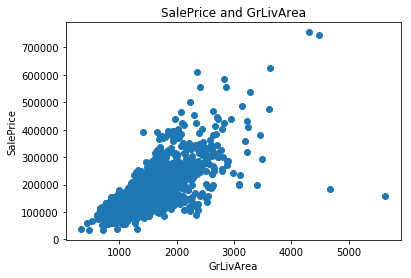

In [138]:
# outlier 
plt.scatter(train.GrLivArea, train.SalePrice)
plt.title('SalePrice and GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

In [139]:
# remove outlier
train = train[train.GrLivArea < 4000]
train.shape

(1456, 81)

In [140]:
# log transform the target var
train.SalePrice = np.log1p(train.SalePrice)
y = train.SalePrice

/miniconda3/envs/ml36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


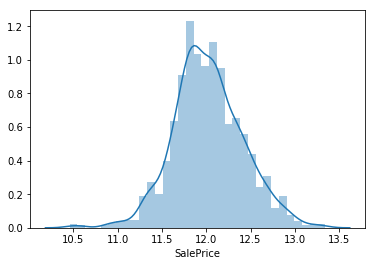

In [141]:
sns.distplot(train['SalePrice']);

In [142]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                       test.loc[:,'MSSubClass':'SaleCondition']))
all_data.shape

(2915, 79)

In [143]:
# create a col to record missing value per row before missing value processing
all_data['missing_per_row'] = all_data.isnull().sum(axis=1)
all_data['missing_per_row'].value_counts()

4     1266
5      993
3      267
6      122
10     114
9       64
2       29
11      17
7       14
15      10
8        9
14       3
12       3
1        2
13       1
16       1
Name: missing_per_row, dtype: int64

In [144]:
# col with missing value
all_data_na = (all_data.isnull().sum()) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na==0].index).sort_values(ascending=False)
all_data_na.index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageFinish', 'GarageYrBlt', 'GarageQual', 'GarageCond', 'GarageType',
       'BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1',
       'MasVnrType', 'MasVnrArea', 'MSZoning', 'BsmtFullBath', 'BsmtHalfBath',
       'Utilities', 'Functional', 'Exterior2nd', 'Exterior1st', 'SaleType',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'Electrical', 'KitchenQual',
       'GarageCars', 'GarageArea', 'TotalBsmtSF'],
      dtype='object')

In [145]:
# input missing
by = ["Alley", "BsmtQual", "BsmtCond", "BsmtFinType1",
     "BsmtFinType2", "Fence", "FireplaceQu", "GarageType", "GarageFinish",
     "GarageQual", "GarageCond", "MasVnrType", "MiscFeature", "PoolQC"]
for col in by:
    all_data[col] = all_data[col].fillna('None')

In [146]:
by = ["BsmtExposure"]
for col in by:
    all_data[col] = all_data[col].fillna('No')

In [147]:
by = ["BedroomAbvGr", "BsmtFullBath", "BsmtHalfBath", "BsmtUnfSF","EnclosedPorch",
     "GarageArea", "GarageCars", "LotFrontage", "MasVnrArea", "GarageYrBlt", "TotalBsmtSF",
     "BsmtFinSF1", "BsmtFinSF2"]
for col in by:
    all_data[col] = all_data[col].fillna(0)

In [148]:
by = ["CentralAir" ]
for col in by:
    all_data[col] = all_data[col].fillna('N')

In [149]:
by = ["Condition1", "Condition2", "Functional", "KitchenQual", "Utilities",
     "MSZoning", "SaleType", "Electrical", "Exterior1st", "Exterior2nd"]
for col in by:
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

In [150]:
# map some numerical vars to categorical
cate_feat = ['MSSubClass', 'OverallCond', 'YrSold', 'MoSold']
for feat in cate_feat:
    all_data[feat] = all_data[feat].astype(str) 

In [151]:
# map some categorical vars to ordinar
Alley = {"None" : 0, "Grvl" : 1, "Pave" : 2}
BsmtQual = {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5}
BsmtExposure = {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3}
BsmtFinType = {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6}
Functional = {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, "Min2" : 6, "Min1" : 7, "Typ" : 8}
LandSlope = {"Sev" : 1, "Mod" : 2, "Gtl" : 3}
LotShape = {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4}
PavedDrive = {"N" : 0, "P" : 1, "Y" : 2}
Street = {"Grvl" : 1, "Pave" : 2}
Utilities = {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}

In [173]:
all_data = all_data.replace({"Alley":Alley,
                             "BsmtQual":BsmtQual,
                             "BsmtCond":BsmtQual,
                             "BsmtExposure":BsmtExposure,
                             "BsmtFinType1":BsmtFinType,
                             "BsmtFinType2":BsmtFinType,
                             "ExterCond":BsmtQual,
                             "ExterQual":BsmtQual,
                             "FireplaceQu":BsmtQual,
                             "Functional":Functional,
                             "GarageCond":BsmtQual,
                             "GarageQual":BsmtQual,
                             "HeatingQC":BsmtQual,
                             "KitchenQual":BsmtQual,
                             "LandSlope":LandSlope,
                             "LotShape" :LotShape,
                             "PavedDrive":PavedDrive,
                             "PoolQC":BsmtQual,
                             "Street":Street ,
                             "Utilities":Utilities
                             })

In [ ]:
# feature engineering

In [ ]:
# 1. simplified existing features

In [177]:
SimplOverallQual = {1:1, 2:1, 3:1, # bad
                    4:2, 5:2, 6:2, # average
                    7:3, 8:3, 9:3, 10:3 # good
                   }
all_data['SimplOverallQual'] = all_data.OverallQual.replace(SimplOverallQual)
all_data['SimplOverallCond'] = all_data.OverallCond.replace(SimplOverallQual)

In [181]:
SimplPoolQC = {1:1, 2:1, # bad
               3:2, 4:2  # good
              }
all_data['SimplPoolQC'] = all_data.PoolQC.replace(SimplPoolQC)

In [187]:
SimplFunctional = {1 : 1, 2 : 1, # bad
                   3 : 2, 4 : 2, # major
                   5 : 3, 6 : 3, 7 : 3, # minor
                   8 : 4 # typical
                  }
train["SimplFunctional"] = train.Functional.replace(SimplFunctional)

In [199]:
SimplGarageCond = {1:1, #bad
                   2:2, 3:2, # average
                   4:3, 5:3, 6:3 # good
                  }
all_data['SimplGarageCond'] = all_data.GarageCond.replace(SimplGarageCond)
all_data['SimplGarageQual'] = all_data.GarageQual.replace(SimplGarageCond)
all_data['SimplFireplaceQu'] = all_data.FireplaceQu.replace(SimplGarageCond)

all_data['SimplKitchenQual'] = all_data.KitchenQual.replace(SimplGarageCond)
all_data['SimplHeatingQC'] = all_data.HeatingQC.replace(SimplGarageCond)
all_data['SimplBsmtCond'] = all_data.BsmtCond.replace(SimplGarageCond)
all_data['SimplBsmtQual'] = all_data.BsmtQual.replace(SimplGarageCond)

all_data['SimplExterCond'] = all_data.ExterCond.replace(SimplGarageCond)
all_data['SimplExterQual'] = all_data.ExterQual.replace(SimplGarageCond)

all_data['SimplBsmtFinType1'] = all_data.BsmtFinType1.replace(SimplGarageCond)
all_data['SimplBsmtFinType2'] = all_data.BsmtFinType2.replace(SimplGarageCond)

In [185]:
# plot cate and target
def plot_box(x, y, df=train, figsize=(8,6)):
    data = pd.concat([df[x], df[y]], axis=1)
    f, ax = plt.subplots(figsize=figsize)
    fig = sns.boxplot(x=x, y=y, data=data)
    fig.axis(ymin=0)

In [ ]:
# 2. combinations of existing features

In [202]:
# 2.1 original features

# overall quality of property
all_data["OverallGrade"] = all_data["OverallQual"] * all_data["OverallCond"]

# overall quality of garage
all_data["GarageGrade"] = all_data["GarageQual"] * all_data["GarageCond"]

# overall quality of exterior
all_data["ExterGrade"] = all_data["ExterQual"] * all_data["ExterCond"]

# overall score of kitchen
all_data["KitchenScore"] = all_data["KitchenQual"] * all_data["KitchenAbvGr"]

# overall score of fireplace
all_data["FireplaceScore"] = all_data["FireplaceQu"] * all_data["Fireplaces"]

# overall score of garage
all_data["GarageScore"] = all_data["GarageQual"] * all_data["GarageArea"]

# overall score of pool
all_data["PoolScore"] = all_data["PoolQC"] * all_data["PoolArea"]

In [203]:
# 2.2 simplified features

# overall quality of property
all_data["SimplOverallGrade"] = all_data["SimplOverallQual"] * all_data["SimplOverallCond"]

# overall quality of exterior
all_data["SimplExterGrade"] = all_data["SimplExterQual"] * all_data["SimplExterCond"]

# overall score of pool
all_data["SimplPoolScore"] = all_data["PoolArea"] * all_data["SimplPoolQC"]

# overall quality of garage
all_data["SimplGarageScore"] = all_data["GarageArea"] * all_data["SimplGarageQual"]

# overall score of fireplace
all_data["SimplFireplaceScore"] = all_data["Fireplaces"] * all_data["SimplFireplaceQu"]

# overall score of kitchen
all_data["SimplKitchenScore"] = all_data["KitchenAbvGr"] * all_data["SimplKitchenQual"]


In [205]:
# 2.3 aggregated values

# total number of bathrooms
all_data["TotalBath"] = all_data["BsmtFullBath"] + 0.5*all_data["BsmtHalfBath"] + all_data["FullBath"] + 0.5*all_data["HalfBath"]

# total area (Square Feet)
all_data["AllSF"] = all_data["GrLivArea"] + all_data["TotalBsmtSF"] 

# total area (Square Feet) for porch
all_data["AllPorchSF"] = all_data["OpenPorchSF"] + all_data["EnclosedPorch"] + all_data["3SsnPorch"] + all_data["ScreenPorch"] 

In [212]:
# 2.4 boolen values
# if has MasVnr
all_data['HasMasVnr'] = (all_data['MasVnrType'] != 'None') * 1

# if a property owns a specific nice feature that could increase the its value
nice_features = ['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']
for col in nice_features:
    all_data['Has'+col] = (all_data[col] != 0) * 1
    
# house is completed before purchsing
all_data['AlreadyCompleted'] = (all_data['SaleCondition'] != 'Partial') * 1

In [220]:
# check what types of data we have
# count of variable types
def data_type_statistics(df=all_data):
    df_types = pd.DataFrame(df.dtypes)
    df_types.columns = ['type']
    print(df_types.type.value_counts())
    return df_types

df_types = data_type_statistics()

int64      73
object     30
float64    15
Name: type, dtype: int64


In [240]:
train_tmp = all_data[:len(train)]
train_tmp = pd.concat([train['SalePrice'], train_tmp], axis=1)
train_tmp.shape

(1456, 164)

In [238]:
# feature importance by correlation
corr = train_tmp.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
print(corr.SalePrice)
top_imp_features = list(corr.SalePrice[1:16].index)
top_imp_features

SalePrice              1.000
OverallQual            0.819
AllSF                  0.817
AllFlrsSF              0.729
GrLivArea              0.719
SimplOverallQual       0.708
ExterQual              0.681
GarageCars             0.680
TotalBath              0.673
KitchenQual            0.667
GarageScore            0.657
GarageArea             0.655
SimplGarageScore       0.651
TotalBsmtSF            0.642
SimplExterQual         0.636
BsmtQual               0.615
1stFlrSF               0.614
SimplKitchenQual       0.610
FullBath               0.591
YearBuilt              0.589
ExterGrade             0.587
YearRemodAdd           0.569
SimplBsmtQual          0.564
FireplaceQu            0.547
SimplFireplaceQu       0.534
TotRmsAbvGrd           0.533
FireplaceScore         0.518
SimplExterGrade        0.513
SimplFireplaceScore    0.508
Fireplaces             0.487
                       ...  
AllPorchSF             0.199
LotFrontage            0.174
Functional             0.136
ScreenPorch   

['OverallQual',
 'AllSF',
 'AllFlrsSF',
 'GrLivArea',
 'SimplOverallQual',
 'ExterQual',
 'GarageCars',
 'TotalBath',
 'KitchenQual',
 'GarageScore',
 'GarageArea',
 'SimplGarageScore',
 'TotalBsmtSF',
 'SimplExterQual',
 'BsmtQual']

In [239]:
# create new feature
# 2.3 polynominals on the top 10 existing features

for col in top_imp_features:
    all_data[col+"_s2"] = all_data[col] ** 2
    all_data[col+"_s3"] = all_data[col] ** 3
    all_data[col+"_sq"] = np.sqrt(all_data[col])
all_data.shape

(2915, 163)

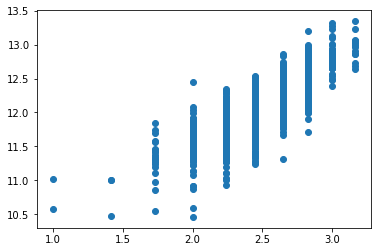

In [243]:
plt.scatter(train_tmp.OverallQual_sq, train_tmp.SalePrice)

In [ ]:
# feature types

In [244]:
# check types statistics
df_types = data_type_statistics()

int64      89
float64    44
object     30
Name: type, dtype: int64


In [250]:
cate_feat = all_data.select_dtypes(include=['object']).columns
num_feat = all_data.select_dtypes(exclude=['object']).columns
print(len(cate_feat))
print(len(num_feat))
all_cat, all_num = all_data[cate_feat], all_data[num_feat]

30
133


In [251]:
# check if there is still some missing data
# col with missing value
all_data_na = (all_data.isnull().sum()) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na==0].index).sort_values(ascending=False)
all_data_na.index
# no missing values found

Index([], dtype='object')

In [258]:
# log transform num
skewness = all_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
all_num[skewness.index] = np.log1p(all_num[skewness.index])

/miniconda3/envs/ml36/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [261]:
# create dummy for cate var
all_cat = pd.get_dummies(all_cat)
all_cat.shape

(2915, 308)

In [310]:
# Modelling
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV , Lasso, ElasticNet, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb

/miniconda3/envs/ml36/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [268]:
all_data = pd.concat([all_cat, all_num], axis=1)
train, test = all_data[:len(train)], all_data[len(train):]

(1456, 441)

In [270]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.3, random_state=0)
X_train.shape

(1019, 441)

In [273]:
# standard scalling the num features
stdSc = StandardScaler()

X_train.loc[:, num_feat] = stdSc.fit_transform(X_train.loc[:, num_feat])
X_test.loc[:, num_feat] = stdSc.transform(X_test.loc[:, num_feat])

/miniconda3/envs/ml36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/miniconda3/envs/ml36/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/miniconda3/envs/ml36/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/miniconda3/envs/ml36/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Standar

In [281]:
# def evaluation metric rmse

def rmse_cv_train(model, n_folds=5):
    kf = KFold(n_folds, shuffle=True, random_state=1).get_n_splits(X_train.values)
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=kf))
    return(rmse)

def rmse_cv_test(model, n_folds=5):
    kf = KFold(n_folds, shuffle=True, random_state=1).get_n_splits(X_test.values)
    rmse = np.sqrt(-cross_val_score(model, X_test, y_test, scoring="neg_mean_squared_error", cv=kf))
    return(rmse)

In [282]:
# LR
lr = LinearRegression()
lr.fit(X_train, y_train)
print(rmse_cv_train(lr).mean())
print(rmse_cv_train(lr).mean())

411659.02073167
411659.02073167


In [314]:
# Lasso
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
score = rmse_cv_train(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
# Lasso score: 0.1139 (0.0084)
print(rmse_cv_test(lasso).mean())
# 0.12307205938144347

/miniconda3/envs/ml36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/miniconda3/envs/ml36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/miniconda3/envs/ml36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/miniconda3/envs/ml36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not conver


Lasso score: 0.1139 (0.0084)



/miniconda3/envs/ml36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/miniconda3/envs/ml36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/miniconda3/envs/ml36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.12307205938144347


/miniconda3/envs/ml36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [315]:
# KRR
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
score = rmse_cv_train(KRR)
print("\nKRR: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
# KRR: 0.1163 (0.0077)
print(rmse_cv_test(KRR).mean())
# 0.11731470361142962


KRR: 0.1163 (0.0077)

0.11731470361142962


In [309]:
# GBM
GBoost = GradientBoostingRegressor(n_estimators=6000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=30, min_samples_split=10, 
                                   loss='huber', random_state =5)
score = rmse_cv_train(GBoost)
print("\nGBoost: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
# GBoost: 0.1272 (0.0108)
print(rmse_cv_test(GBoost).mean())
# 0.13720823785535163


GBoost: 0.1272 (0.0108)



In [311]:
# XGB
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
score = rmse_cv_train(model_xgb)
print("\nXGB: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
# 


XGB: 0.1225 (0.0091)



In [317]:
print(rmse_cv_test(model_xgb).mean())
# 0.11731470361142962

0.12988771399777393


In [312]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
score = rmse_cv_train(model_lgb)
print("\nLGB: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
# GBoost: 0.1223 (0.0074)
print(rmse_cv_test(model_lgb).mean())
# 0.12783131540520723


GBoost: 0.1223 (0.0074)



0.12783131540520723
